In [1]:
import numpy as np
import os
import tensorflow as tf                
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle                      
import cv2                                 
from tqdm import tqdm
import matplotlib.gridspec as gridspec
from random import randint

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Creating labels for the dataset
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

IMAGE_SIZE = (150, 150)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    seg_train = r'C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_train'
    seg_test = r"C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_test"
    
    datasets = [seg_train, seg_test]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_train


100%|██████████| 2382/2382 [00:03<00:00, 736.98it/s]


Loading C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_test


100%|██████████| 501/501 [00:00<00:00, 662.45it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Data Exploration 

- Visualising the number of training and testing data 

- Visualising the proportion of each observed category within the data set

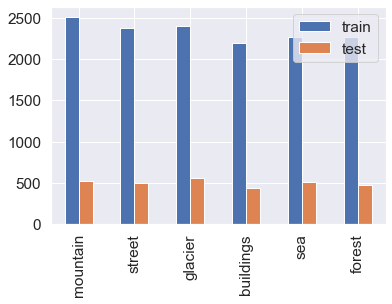

In [6]:
#Visualise the number of images in train and test dataset 
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

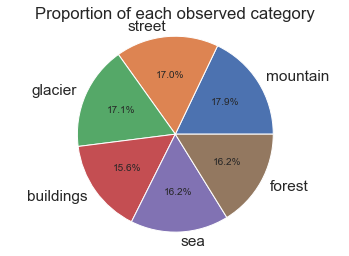

In [7]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [8]:
#For the cleaned data set
def load_data():
    """
        Load the data:
            - 12,000 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    seg_train_cleaned = r'C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_train_cleaned'
    seg_test_cleaned =  r"C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_test_cleaned"
    datasets = [seg_train_cleaned,seg_test_cleaned]
    output = []
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [9]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_train_cleaned


100%|██████████| 2000/2000 [00:02<00:00, 797.27it/s]


Loading C:\Users\ziyan\OneDrive\NTU BCG Y1S2 2022\SC1015 Intro to DSAI\SC1015 project\seg_test_cleaned


100%|██████████| 500/500 [00:00<00:00, 557.14it/s]


In [10]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)


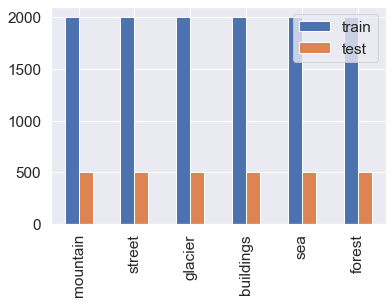

In [11]:
#Visualise the number of images in train and test dataset 
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

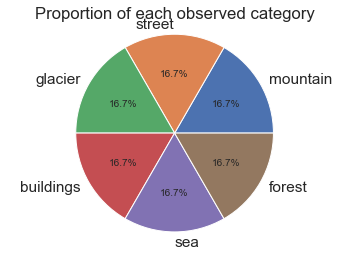

In [12]:
#Visualise the proportion of images based on train data 

plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

# Scale the dataset 
- When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.
- To reduce this we can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

In [13]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Visualize the dataset
### Display a random image from the training set.

In [14]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

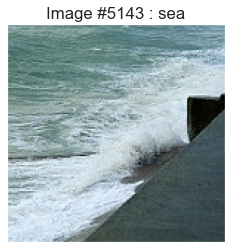

In [15]:
display_random_image(class_names, train_images, train_labels)


### Display the first 25 images from the training set 

In [16]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

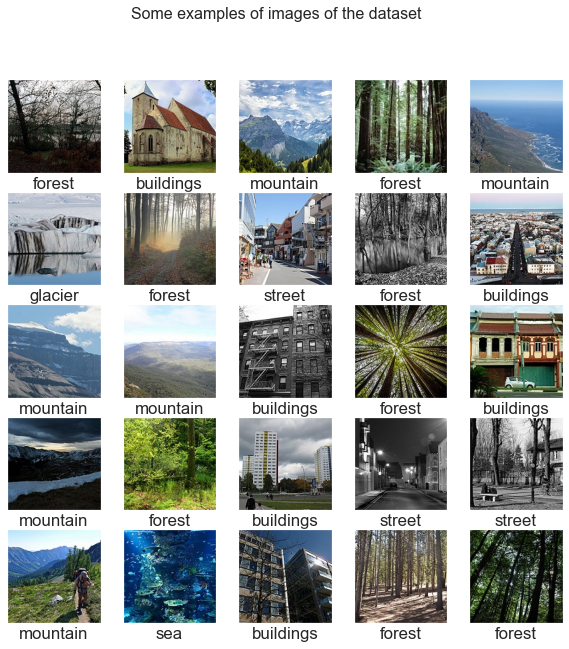

In [17]:
display_examples(class_names, train_images, train_labels)


# Base Model for our Convolutional neural network

- Build the model,
- Compile the model,
- Train / fit the data to the model, 
- Evaluate the model on the testing set and validation set,
- Carry out an error analysis of our model.


Our model consist of different layers such as:

- Conv2D: (32 filters of size 3 by 3)  the filters will slide through the input image to "extract" various features of the image
- MaxPooling2D: The images get half sized to a 2x2 layer. 
- Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
- Relu : given a value x, returns max(x, 0).
- Softmax: 6 output neurons, probability that the image belongs to one of the classes.

We will start running our model with 64 epoches. 

In [18]:
#Baseline model1
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(6, activation=tf.nn.softmax) 
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

# Maybe here can add picture of what our base model will look like

In [19]:
#this is where we compile the model
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history1 = model1.fit(train_images, train_labels, batch_size=128, epochs=64, validation_split = 0.2)

Epoch 1/64
75/75 [==============================] - 101s 1s/step - loss: 1.2356 - accuracy: 0.5446 - val_loss: 0.8848 - val_accuracy: 0.6712
Epoch 2/64
75/75 [==============================] - 88s 1s/step - loss: 0.7681 - accuracy: 0.7147 - val_loss: 0.7326 - val_accuracy: 0.7412
Epoch 3/64
75/75 [==============================] - 88s 1s/step - loss: 0.6308 - accuracy: 0.7695 - val_loss: 0.7252 - val_accuracy: 0.7437
Epoch 4/64
75/75 [==============================] - 95s 1s/step - loss: 0.4771 - accuracy: 0.8340 - val_loss: 0.6884 - val_accuracy: 0.7617
Epoch 5/64
75/75 [==============================] - 92s 1s/step - loss: 0.3272 - accuracy: 0.8882 - val_loss: 0.6701 - val_accuracy: 0.7717
Epoch 6/64
75/75 [==============================] - 103s 1s/step - loss: 0.2333 - accuracy: 0.9236 - val_loss: 0.7404 - val_accuracy: 0.7688
Epoch 7/64
75/75 [==============================] - 89s 1s/step - loss: 0.1606 - accuracy: 0.9518 - val_loss: 0.7887 - val_accuracy: 0.7696
Epoch 8/64
75/75 [

In [21]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

# Validation loss 
- The validation loss increases as the number of epochs increases. 
- The first model is overfitting the training dataset 

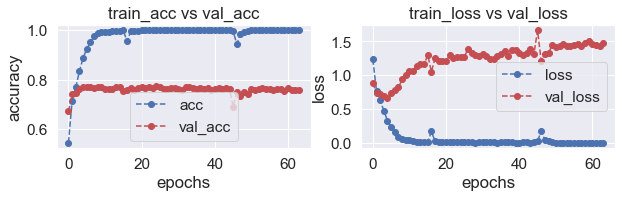

In [22]:
plot_accuracy_loss(history1)

In [23]:
test_loss = model1.evaluate(test_images, test_labels)

94/94 [==============================] - 6s 61ms/step - loss: 1.5125 - accuracy: 0.7583


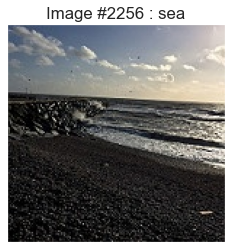

In [24]:
predictions = model1.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
display_random_image(class_names, test_images, pred_labels)

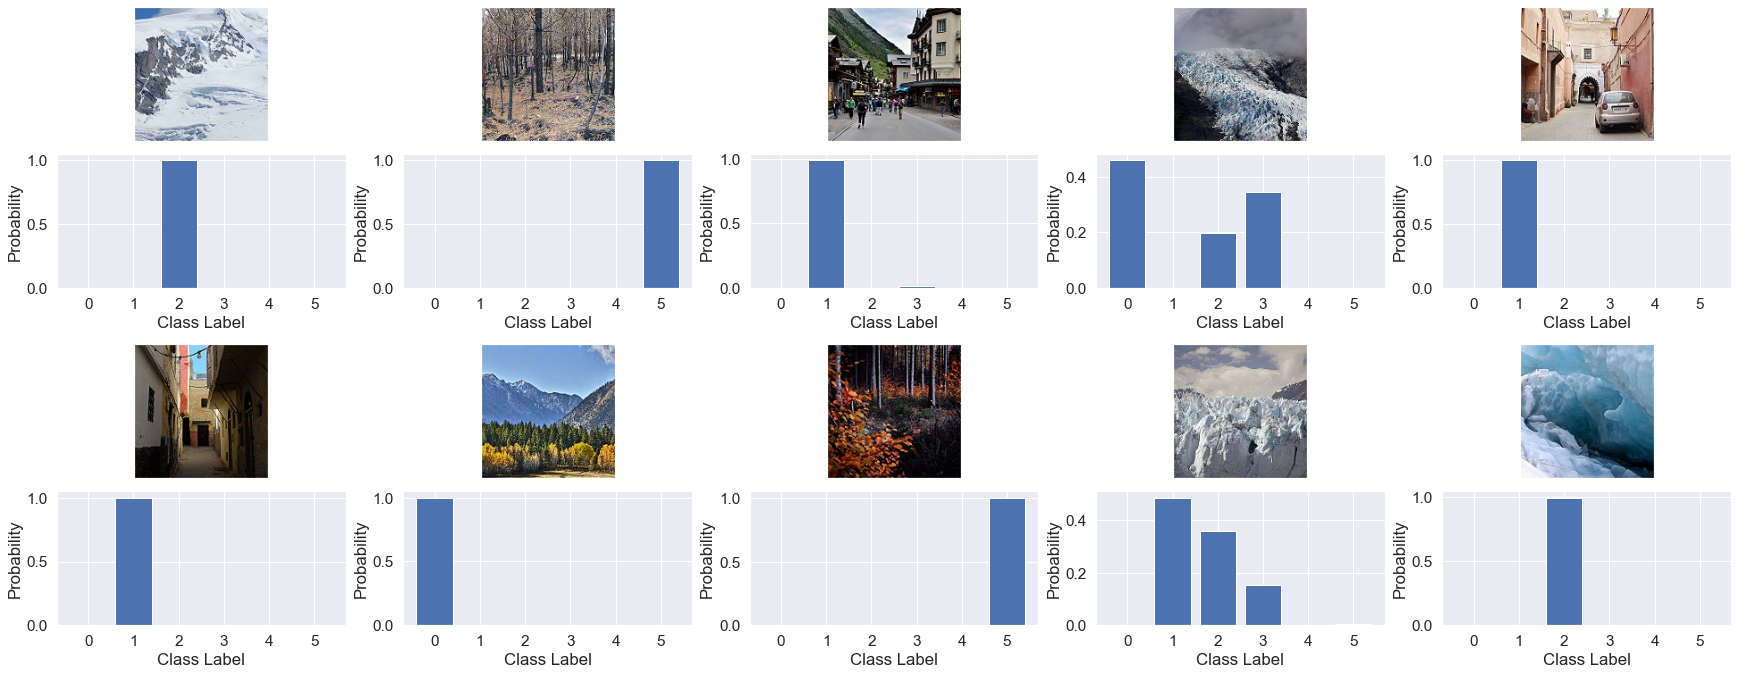

In [25]:
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_images))
    pred_image = np.array([test_images[rnd_number]])
    pred_class = np.argmax(pred_image, axis = 1)
    pred_prob = model1.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            #ax.set_title(pred_class[0])
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)

        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)
            ax.set_xticks([0,1,2,3,4,5])
            # Set common labels
            ax.set_xlabel('Class Label')
            ax.set_ylabel('Probability')

plt.show()

# Error analysis


We can try to understand on which kind of images the classifier has trouble.

In [26]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

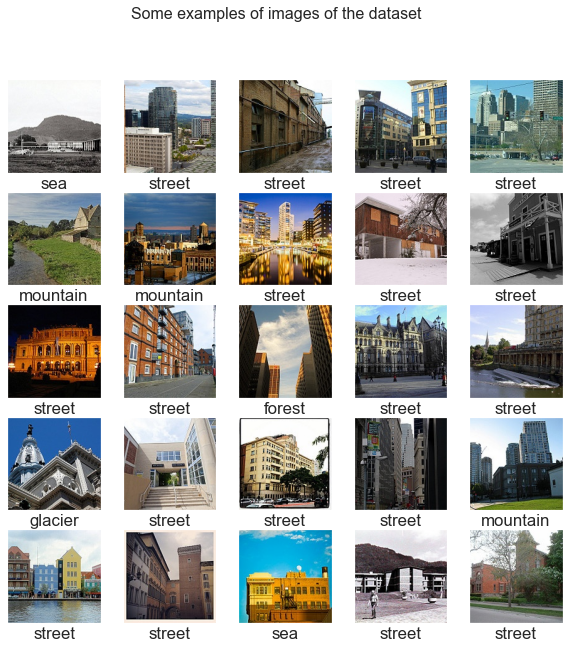

In [27]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

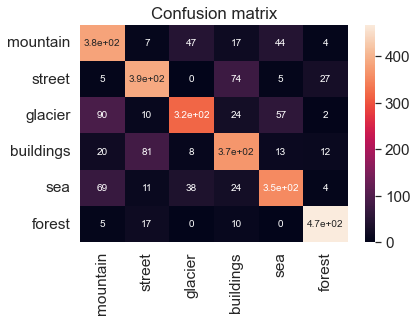

In [28]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

## Conclusion: Model works most poorly for images of seas & streets.


Model works very well at predicting forests accurately.

Seas are often wrongly classified as mountains. This is understandable as images of seas may include mountains in the background.

Images of buildings are also often classified as streets. Again, images of buildings may include streets, which makes it hard for the model to classify correctly.


# Model 2 

For our second model Dropout Layers are introduced. 
- Dropout: randomly killing each neuron in a layer of a training set with probability p

In [29]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
]) #dropout is to prevent over fitting, the effect of the random dropout forces the network to learn a redundant representation of the data
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)       

In [30]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history2 = model2.fit(train_images, train_labels, batch_size=128, epochs=64, validation_split = 0.2)

Epoch 1/64
75/75 [==============================] - 99s 1s/step - loss: 1.5914 - accuracy: 0.3721 - val_loss: 1.1778 - val_accuracy: 0.5908
Epoch 2/64
75/75 [==============================] - 98s 1s/step - loss: 1.1186 - accuracy: 0.5684 - val_loss: 1.0065 - val_accuracy: 0.6325
Epoch 3/64
75/75 [==============================] - 98s 1s/step - loss: 0.9637 - accuracy: 0.6380 - val_loss: 0.8252 - val_accuracy: 0.7113
Epoch 4/64
75/75 [==============================] - 98s 1s/step - loss: 0.8745 - accuracy: 0.6793 - val_loss: 0.7713 - val_accuracy: 0.7271
Epoch 5/64
75/75 [==============================] - 98s 1s/step - loss: 0.7805 - accuracy: 0.7180 - val_loss: 0.7766 - val_accuracy: 0.6992
Epoch 6/64
75/75 [==============================] - 99s 1s/step - loss: 0.7070 - accuracy: 0.7470 - val_loss: 0.6730 - val_accuracy: 0.7642
Epoch 7/64
75/75 [==============================] - 101s 1s/step - loss: 0.6455 - accuracy: 0.7680 - val_loss: 0.6451 - val_accuracy: 0.7837
Epoch 8/64
75/75 [=

Epoch 59/64
75/75 [==============================] - 98s 1s/step - loss: 0.0876 - accuracy: 0.9621 - val_loss: 1.3861 - val_accuracy: 0.8075
Epoch 60/64
75/75 [==============================] - 98s 1s/step - loss: 0.0896 - accuracy: 0.9610 - val_loss: 1.4084 - val_accuracy: 0.7971
Epoch 61/64
75/75 [==============================] - 98s 1s/step - loss: 0.0885 - accuracy: 0.9630 - val_loss: 1.3574 - val_accuracy: 0.8025
Epoch 62/64
75/75 [==============================] - 97s 1s/step - loss: 0.0919 - accuracy: 0.9642 - val_loss: 1.3530 - val_accuracy: 0.8012
Epoch 63/64
75/75 [==============================] - 100s 1s/step - loss: 0.0841 - accuracy: 0.9648 - val_loss: 1.3373 - val_accuracy: 0.8033
Epoch 64/64
75/75 [==============================] - 101s 1s/step - loss: 0.0921 - accuracy: 0.9604 - val_loss: 1.4168 - val_accuracy: 0.7946


# Validation loss 
- The validation loss increases as the number of epochs increases. 
- The second model is overfitting the training dataset 

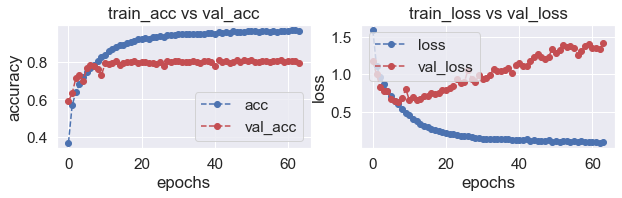

In [32]:
plot_accuracy_loss(history2)

In [33]:
test_loss = model2.evaluate(test_images, test_labels)

94/94 [==============================] - 6s 65ms/step - loss: 1.3706 - accuracy: 0.7873


In [34]:
predictions = model2.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

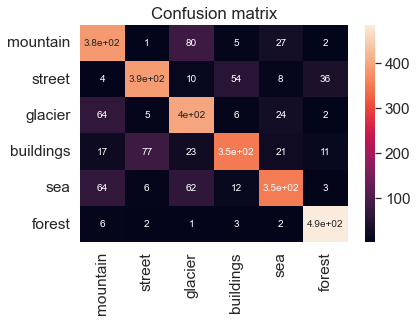

In [35]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

# Model 3

For our three model two more Convulational blocks with dropout Layers are introduced.

In [43]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25), 
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
]) 
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 36, 36, 32)       

In [44]:
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
history3 = model3.fit(train_images, train_labels, batch_size=128, epochs=64, validation_split = 0.2)

Epoch 1/64
75/75 [==============================] - 120s 2s/step - loss: 1.4667 - accuracy: 0.3958 - val_loss: 1.2087 - val_accuracy: 0.5604
Epoch 2/64
75/75 [==============================] - 113s 2s/step - loss: 1.1155 - accuracy: 0.5495 - val_loss: 1.1128 - val_accuracy: 0.5846
Epoch 3/64
75/75 [==============================] - 112s 1s/step - loss: 0.9839 - accuracy: 0.6069 - val_loss: 0.9637 - val_accuracy: 0.6271
Epoch 4/64
75/75 [==============================] - 112s 2s/step - loss: 0.9398 - accuracy: 0.6319 - val_loss: 0.8784 - val_accuracy: 0.6854
Epoch 5/64
75/75 [==============================] - 113s 2s/step - loss: 0.8185 - accuracy: 0.6905 - val_loss: 0.8081 - val_accuracy: 0.6946
Epoch 6/64
75/75 [==============================] - 116s 2s/step - loss: 0.7400 - accuracy: 0.7337 - val_loss: 0.7544 - val_accuracy: 0.7396
Epoch 7/64
75/75 [==============================] - 114s 2s/step - loss: 0.7100 - accuracy: 0.7431 - val_loss: 0.6694 - val_accuracy: 0.7625
Epoch 8/64
75

Epoch 59/64
75/75 [==============================] - 114s 2s/step - loss: 0.1639 - accuracy: 0.9347 - val_loss: 0.5161 - val_accuracy: 0.8662
Epoch 60/64
75/75 [==============================] - 114s 2s/step - loss: 0.1592 - accuracy: 0.9388 - val_loss: 0.5803 - val_accuracy: 0.8479
Epoch 61/64
75/75 [==============================] - 115s 2s/step - loss: 0.1727 - accuracy: 0.9365 - val_loss: 0.6815 - val_accuracy: 0.8258
Epoch 62/64
75/75 [==============================] - 115s 2s/step - loss: 0.1744 - accuracy: 0.9329 - val_loss: 0.5855 - val_accuracy: 0.8492
Epoch 63/64
75/75 [==============================] - 117s 2s/step - loss: 0.1656 - accuracy: 0.9385 - val_loss: 0.5882 - val_accuracy: 0.8458
Epoch 64/64
75/75 [==============================] - 116s 2s/step - loss: 0.1627 - accuracy: 0.9397 - val_loss: 0.5672 - val_accuracy: 0.8533


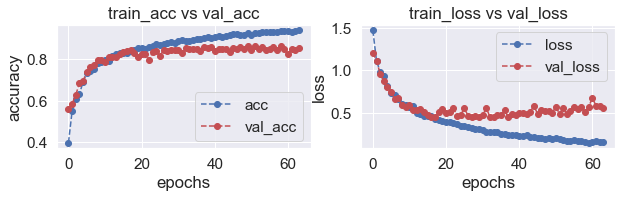

In [46]:
plot_accuracy_loss(history3)

In [47]:
test_loss = model3.evaluate(test_images, test_labels)

94/94 [==============================] - 7s 72ms/step - loss: 0.5443 - accuracy: 0.8550


In [48]:
predictions = model3.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

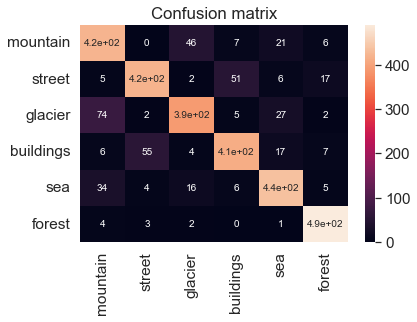

In [49]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

# Model 4
Our fourth model is similar to our third model. However, we decided to change the optimiser and manually decrease the alpha learning rate for gradient descent to minimisse the model's cost function

# Learning Rate
- For every 2 epochs, the learning rate decreases by 0.95 times 

In [51]:
model4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25), 
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
]) 
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 36, 36, 32)       

In [59]:
from keras.callbacks import LearningRateScheduler
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.95, step_size=2):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''

    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch / step_size))

    return LearningRateScheduler(schedule)

In [61]:
from tensorflow.keras.optimizers import SGD, Adam
optimizer = Adam(learning_rate=0.0005)

In [66]:
model4.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [67]:
lr_sched = step_decay_schedule(initial_lr=5e-4, decay_factor=0.95, step_size=2)

In [68]:
history4 = model4.fit(train_images, train_labels, batch_size=128, epochs=64, validation_split = 0.2, callbacks=[lr_sched])

Epoch 1/64
75/75 [==============================] - 119s 2s/step - loss: 1.5251 - accuracy: 0.3590 - val_loss: 1.3193 - val_accuracy: 0.5329 - lr: 5.0000e-04
Epoch 2/64
75/75 [==============================] - 118s 2s/step - loss: 1.1912 - accuracy: 0.5249 - val_loss: 1.2050 - val_accuracy: 0.5817 - lr: 5.0000e-04
Epoch 3/64
75/75 [==============================] - 115s 2s/step - loss: 1.1072 - accuracy: 0.5579 - val_loss: 1.1549 - val_accuracy: 0.5925 - lr: 4.7500e-04
Epoch 4/64
75/75 [==============================] - 117s 2s/step - loss: 1.0311 - accuracy: 0.5969 - val_loss: 1.0951 - val_accuracy: 0.6229 - lr: 4.7500e-04
Epoch 5/64
75/75 [==============================] - 113s 2s/step - loss: 0.9465 - accuracy: 0.6367 - val_loss: 1.1897 - val_accuracy: 0.5667 - lr: 4.5125e-04
Epoch 6/64
75/75 [==============================] - 112s 1s/step - loss: 0.8984 - accuracy: 0.6608 - val_loss: 0.9742 - val_accuracy: 0.6525 - lr: 4.5125e-04
Epoch 7/64
75/75 [==============================] - 

# Validation loss 
- the loss is decreasing slowly over as the number of epochs increases 

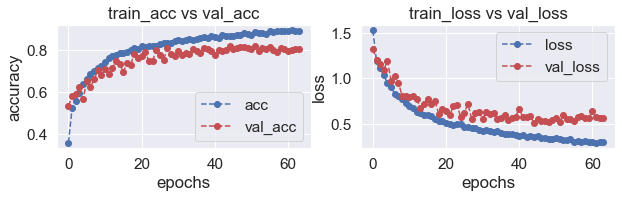

In [69]:
plot_accuracy_loss(history4)

In [70]:
test_loss = model4.evaluate(test_images, test_labels)

94/94 [==============================] - 7s 71ms/step - loss: 0.5448 - accuracy: 0.8210


In [71]:
predictions = model4.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

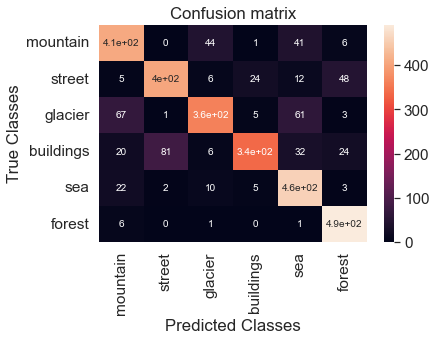

In [72]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

https://stackoverflow.com/questions/39517431/should-we-do-learning-rate-decay-for-adam-optimizer